In [11]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train2 = np.array([[cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)]*3 for img in x_train])
print(x_train2.shape)
x_train2 = tf.transpose(x_train2, [0, 2, 3, 1]).numpy()
x_test2 = np.array([[cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)]*3 for img in x_test])
x_test2 = tf.transpose(x_test2, [0, 2, 3, 1]).numpy()

(50000, 3, 32, 32)


In [6]:
x_train2.shape

(50000, 32, 32, 3)

In [7]:
x_train= x_train / 255.0
x_train2 = x_train2 / 255.0
x_test= x_test / 255.0
x_test2= x_test2 / 255.0

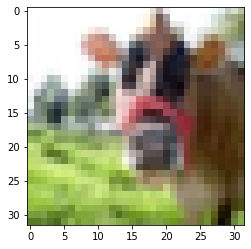

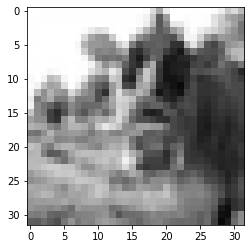

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.pause(0.1)
plt.imshow(x_train2[0])

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [37]:
input = layers.Input(shape=(32, 32, 3))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mae")
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 16, 16, 32)       9248

In [38]:
batch_size = 16
num_classes = 100
epochs = 50

In [39]:
history = autoencoder.fit(x_train2, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.10,
                    shuffle=True)

Epoch 1/50
2813/2813 [==============================] - 10s 3ms/step - loss: 0.0828 - val_loss: 0.0737
Epoch 2/50
2813/2813 [==============================] - 11s 4ms/step - loss: 0.0726 - val_loss: 0.0701
Epoch 3/50
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0701 - val_loss: 0.0696
Epoch 4/50
2813/2813 [==============================] - 11s 4ms/step - loss: 0.0687 - val_loss: 0.0684
Epoch 5/50
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0677 - val_loss: 0.0675
Epoch 6/50
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0671 - val_loss: 0.0661
Epoch 7/50
2813/2813 [==============================] - 10s 4ms/step - loss: 0.0665 - val_loss: 0.0651
Epoch 8/50
2813/2813 [==============================] - 12s 4ms/step - loss: 0.0660 - val_loss: 0.0658
Epoch 9/50
2813/2813 [==============================] - 12s 4ms/step - loss: 0.0657 - val_loss: 0.0657
Epoch 10/50
2813/2813 [==============================] - 11s 4ms/step - l

1/1 [==============================] - 0s 167ms/step


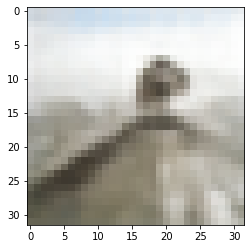

In [40]:
ae_out = autoencoder.predict([ tf.reshape(x_test2[0],(-1, 32, 32, 3)) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0])

1/1 [==============================] - 0s 112ms/step
input


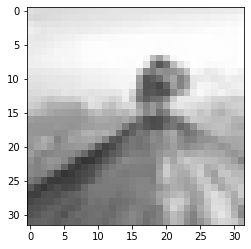

output


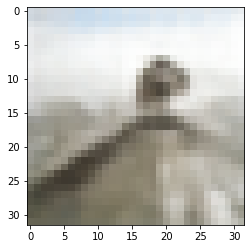

orignal


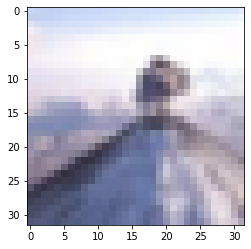

1/1 [==============================] - 0s 109ms/step
input


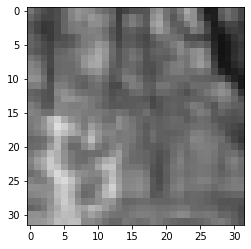

output


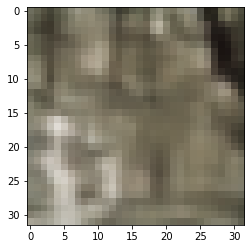

orignal


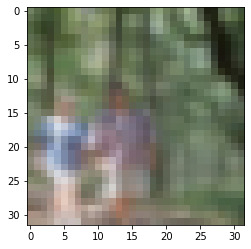

1/1 [==============================] - 0s 107ms/step
input


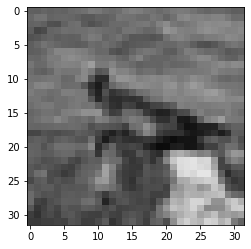

output


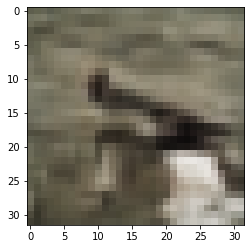

orignal


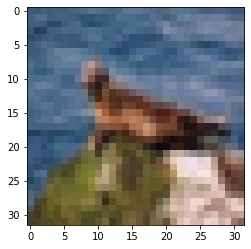

1/1 [==============================] - 0s 110ms/step
input


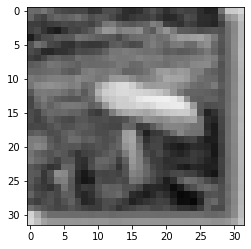

output


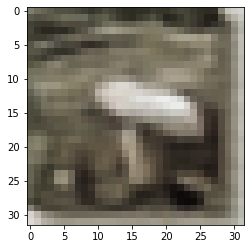

orignal


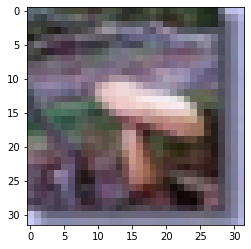

1/1 [==============================] - 0s 114ms/step
input


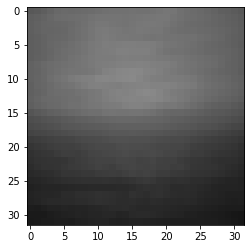

output


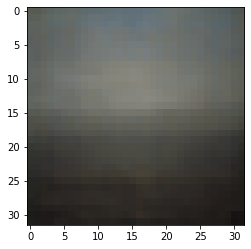

orignal


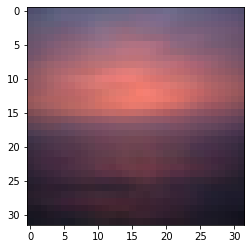

1/1 [==============================] - 0s 132ms/step
input


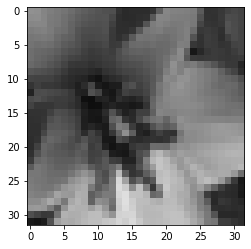

output


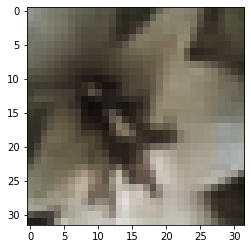

orignal


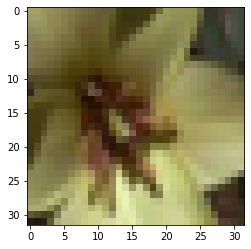

1/1 [==============================] - 0s 106ms/step
input


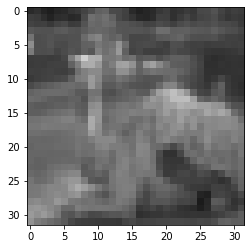

output


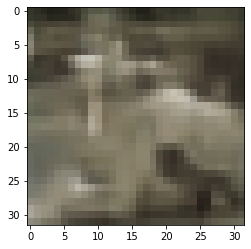

orignal


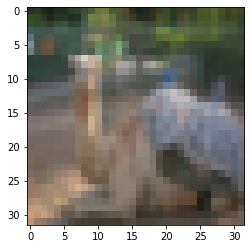

1/1 [==============================] - 0s 108ms/step
input


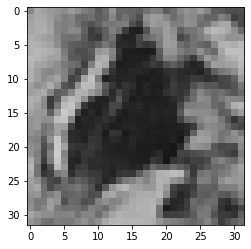

output


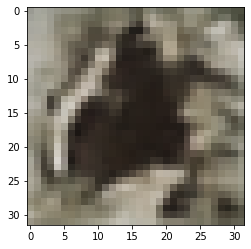

orignal


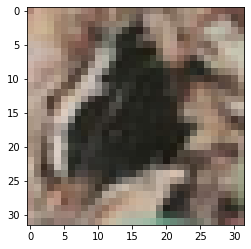

1/1 [==============================] - 0s 112ms/step
input


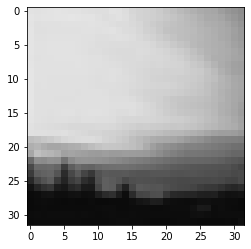

output


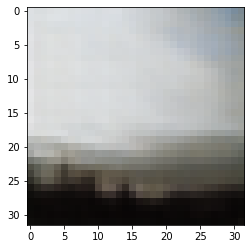

orignal


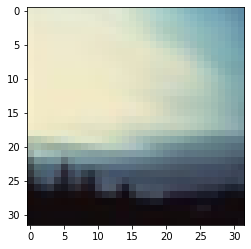

1/1 [==============================] - 0s 111ms/step
input


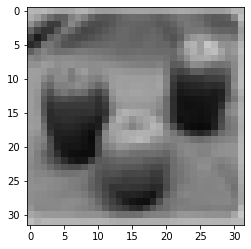

output


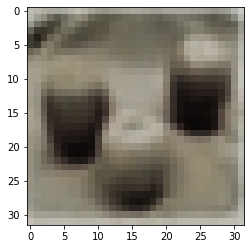

orignal


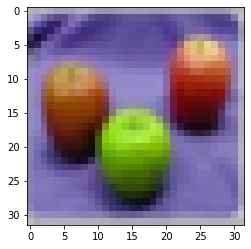

In [41]:

for i in range(10):
    index = i
    ae_out = autoencoder.predict([ tf.reshape(x_test2[index],(-1, 32, 32, 3)) ])
    img = ae_out[0]  
    print("input")
    plt.imshow(x_test2[index],cmap='gray')
    plt.pause(0.1)
    print("output")
    plt.imshow(ae_out[0])
    plt.pause(0.1)
    print("orignal")
    plt.imshow(x_test[index])
    plt.pause(0.1)